# Credit Card Fraud Detection Performance Evaluation with Different Classification Models Such as Random Forest, SVM, Decision Tree and Logistic Regression

### Özgün Gizlenci
### Student No: 21007505
### CSC-40094 AI MODULE
### M.Sc. Computer Science with Artificial Intelligence

In [1]:
#including libraries needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the credit card database
df=pd.read_csv("creditcard.csv")

In [3]:
#checking first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking shape of the dataset
df.shape

(284807, 31)

In [5]:
#checking columns of the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#checking summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#description of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#checking if we have null values
df.isnull().values.any()

False

In [9]:
#counting the null values 
df.isnull().values.sum()

0

In [10]:
# creating subset of the dataframe that includes object
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [11]:
#length of subset
len(df.select_dtypes(include='object').columns)

0

D:\AnacondaNew2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

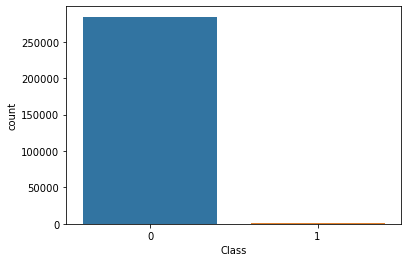

In [12]:
#visualizing the class column with countplot 
sns.countplot(df['Class'])

In [13]:
#non fraud transaction sum
(df.Class==0).sum()

284315

In [14]:
# fraud transaction sum
(df.Class==1).sum()

492

In [15]:
# second dataframe with class column
df_2 = df.drop( columns='Class')

<AxesSubplot:title={'center':'correlated with Class'}>

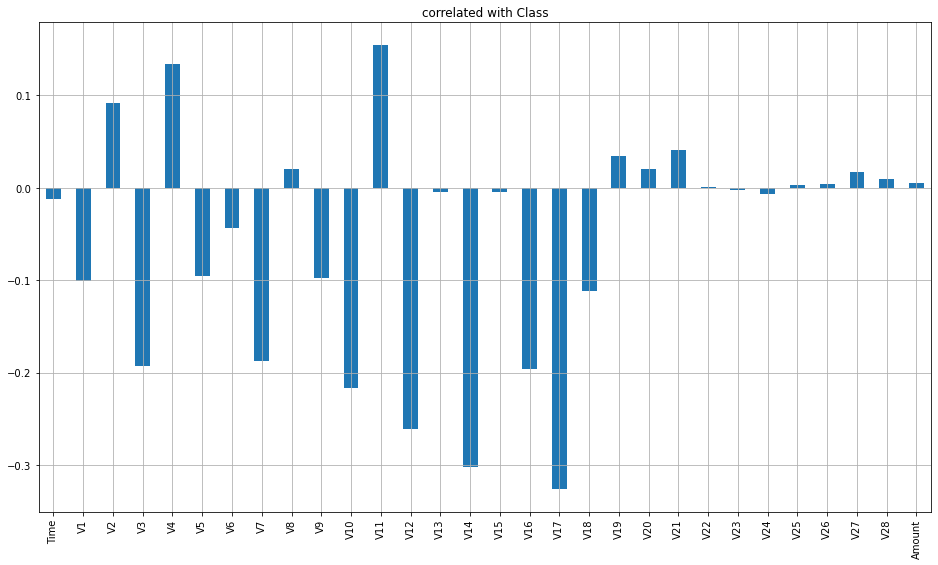

In [16]:
#vizualizing the correlation of class variable with the other variables
df_2.corrwith(df['Class']).plot.bar(figsize=(16,9),title='correlated with Class', grid=True)

In [17]:
#correlation of each variables
corr = df.corr()

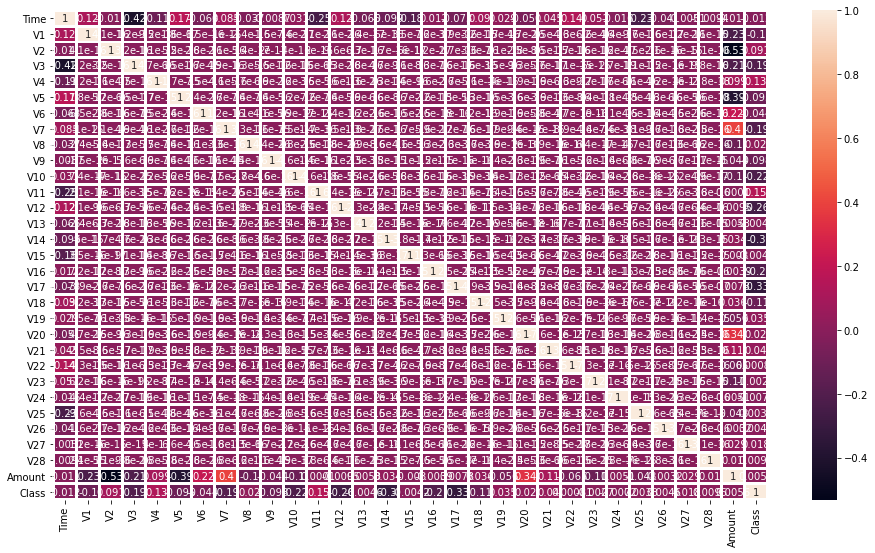

In [18]:
#creating the heatmap of the columns
plt.figure(figsize=(16,9))
ax=sns.heatmap(corr,annot=True,linewidths=2)

In [44]:
#first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
#independent variables of the dataset
x = df.drop(columns='Class')

In [46]:
#dependent variable of the dataset
y=df['Class']

In [47]:
#importing sklearn library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split

In [48]:
#creating train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
#checking shape  of train set
x_train.shape

(227845, 30)

In [50]:
#checking shape of train set
y_train.shape

(227845,)

In [51]:
#checking shape of test set
x_test.shape

(56962, 30)

In [52]:
#checking shape of test set
y_test.shape

(56962,)

In [53]:
#importing preprocessing package to use standart scaler
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
#fitting and transforming the train set
x_train = sc.fit_transform(x_train)

In [56]:
#transforming the test set
x_test = sc.transform(x_test)

In [57]:
#display the train set after fit and transform
x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [58]:
#display the test set after fit and transform
x_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

### Logistic Regression Classifier

In [59]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [60]:
#logistic regression classifier variable
classifir_lr = LogisticRegression(random_state=0)

In [61]:
#classifying the model
classifir_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [62]:
#prediction with test set
y_pred = classifir_lr.predict(x_test)

In [63]:
#importing metrics to calculate the accuracy and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [64]:
#accuracy of the model
acc = accuracy_score(y_test,y_pred)
print(acc*100)

99.91924440855307


In [65]:
# Compute the average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.5561900413996519


In [66]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)

In [67]:
print(cm)

[[56852     9]
 [   37    64]]


### Random Forest Classifier

In [68]:
#including the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
classifir_rf = RandomForestClassifier(random_state=0)

In [70]:
#fitting the classification model
classifir_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [71]:
#prediction from test set
y_pred = classifir_rf.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
#accuracy of the random forest classifier
acc=accuracy_score(y_test,y_pred)

In [74]:
print(acc*100)

99.94908886626172


In [75]:
# Compute the average precision score for the random forest
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.7188987713231881


In [76]:
#confussion matrix of random forest classifier
cm= confusion_matrix(y_test,y_pred)

In [77]:
print(cm)

[[56854     7]
 [   22    79]]


### Single Prediction

In [78]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
single_obs=[[0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425]]

In [80]:
classifir_rf.predict(sc.transform(single_obs))

D:\AnacondaNew2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Support Vector Machine Classifier

In [81]:
#importing the svm and linear svc
from sklearn.svm import SVC, LinearSVC 
from sklearn.preprocessing import StandardScaler 

In [82]:
#fitting the classification model with the train datasets
lin_clf = LinearSVC(random_state=42) 
lin_clf.fit(x_train, y_train) 

D:\AnacondaNew2\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [88]:
#calculating the accuracy of the svm model
from sklearn.metrics import accuracy_score 
y_pred = lin_clf.predict(x_train) 
acc=accuracy_score(y_train, y_pred) 
print(acc*100)

99.93153240141324


In [90]:
# Compute the average precision score
average_precision = average_precision_score(y_train, y_pred, average='micro')
print(average_precision)

0.6128763020528296


In [92]:
#confussion matrix of svm classifier
cm= confusion_matrix(y_train,y_pred)
print(cm)

[[227417     37]
 [   119    272]]


### Decision Tree Classifier

In [93]:
#importing grid search with cross-validation to find good hyperparameter vaues
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 
#creating the parameters for decision tree
params = {'max_leaf_nodes': list(range(2, 5)), 'min_samples_split': [2, 3, 4]}

#fitting model to the train set with grid search algorithm
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3) 
grid_search_cv.fit(x_train, y_train) 
grid_search_cv.best_estimator_ 
#accuracy of decision tree
from sklearn.metrics import accuracy_score 
y_pred = grid_search_cv.predict(x_test) 
acc=accuracy_score(y_test, y_pred) 
print(acc*100)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
99.92451107756047


In [94]:
# Compute the average precision score
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.6058158936356858


In [96]:
#confussion matrix of decision tree classifier
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[56844    17]
 [   26    75]]
